# SALib Validation Files
This outputs files from SALib sobol analysis with Borehole function.

## Set Up

In [38]:
import SALib

from SALib.sample import saltelli
from SALib.analyze import sobol
from __future__ import division

import numpy as np
import csv
import math

#extra plotting
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## Define the Borehole Function

In [39]:
def borehole_evaluate(values):
    
    Y = np.zeros([values.shape[0]])
    
    for i, X in enumerate(values):
        
        rw =    X[0] # radius of borehole (m)
        r =     X[1] # radius of influence (m)
        Tu =    X[2] # transmissivity of upper aquifer (m2/yr)
        Hu =    X[3] # potentiometric head of upper aquifer (m)
        Tl =    X[4] # transmissivity of lower aquifer (m2/yr)
        Hl =    X[5] # potentiometric head of lower aquifer (m)
        L =     X[6] # length of borehole (m)
        Kw =    X[7] # hydraulic conductivity of borehole (m/yr)

        l = np.log(r/rw)
        num = 2 * np.pi * Tu * (Hu - Hl)
        denom = l * (1 + ((2 * L * Tu) / (l * (rw**2) * Kw)) + (Tu/Tl))
        Y[i] = num / denom
        
        Y[i] 

    return Y

## SALib

In [40]:
# SHORT EXAMPLE

# Define the model inputs
            
problem = {
    'num_vars': 8,
    'names': ['rw', 'r', 'Tu', 'Hu', 'Tl', 'Hl', 'L', 'Kw'],
    'bounds': [[0.10, 0.0161812],
               [7.71, 1.0056],
               [63070, 115600],
               [990, 1110],
               [63.1, 116],
               [700, 820],
               [1120, 1680],
               [9855, 12045]
              ],
    'dists': ['norm','lognorm', 'unif', 'unif','unif','unif','unif','unif']
}

# Generate samples
param_values = saltelli.sample(problem, 1000, calc_second_order = True)

# Run model (example)
Y = borehole_evaluate(param_values)

# Perform analysis
Si = sobol.analyze(problem, Y, print_to_console=True)

# Print the first-order sensitivity indices
print (Si['S1'])

/Users/lisarennels/Library/Python/3.8/lib/python/site-packages/SALib/sample/saltelli.py:94: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)


              ST       ST_conf
rw  7.025910e-01  5.319668e-02
r   2.925095e-06  5.878706e-07
Tu  7.940419e-12  1.135924e-12
Hu  1.083814e-01  1.273212e-02
Tl  8.254856e-06  1.574075e-06
Hl  1.077613e-01  1.309971e-02
L   1.027682e-01  1.238959e-02
Kw  2.528156e-02  2.874352e-03
              S1       S1_conf
rw  6.694499e-01  9.278070e-02
r   3.607764e-05  1.627473e-04
Tu  7.116191e-08  2.244192e-07
Hu  9.244930e-02  3.006366e-02
Tl -2.261054e-05  2.466677e-04
Hl  9.478102e-02  2.588314e-02
L   9.207041e-02  2.786445e-02
Kw  1.902297e-02  1.376782e-02
                    S2       S2_conf
(rw, r)   3.780759e-03  1.459057e-01
(rw, Tu)  3.830417e-03  1.459379e-01
(rw, Hu)  2.223501e-02  1.577520e-01
(rw, Tl)  3.869545e-03  1.459463e-01
(rw, Hl)  2.025179e-02  1.564222e-01
(rw, L)   1.152497e-02  1.502130e-01
(rw, Kw)  7.732570e-03  1.445833e-01
(r, Tu)  -8.885077e-05  2.688673e-04
(r, Hu)  -9.564009e-05  2.726761e-04
(r, Tl)  -8.871930e-05  2.688242e-04
(r, Hl)  -9.000310e-05  2.836887e-0

In [41]:
# CONFIDENCE INTERVALS

print (Si['S1_conf'])
print (Si['ST_conf'])
print ()
print (Si['S2_conf'])

[9.27807024e-02 1.62747270e-04 2.24419157e-07 3.00636562e-02
 2.46667698e-04 2.58831365e-02 2.78644477e-02 1.37678239e-02]
[5.31966794e-02 5.87870640e-07 1.13592445e-12 1.27321228e-02
 1.57407485e-06 1.30997058e-02 1.23895944e-02 2.87435234e-03]

[[           nan 1.45905656e-01 1.45937878e-01 1.57751957e-01
  1.45946326e-01 1.56422190e-01 1.50213026e-01 1.44583314e-01]
 [           nan            nan 2.68867294e-04 2.72676121e-04
  2.68824250e-04 2.83688720e-04 2.93865918e-04 2.73692017e-04]
 [           nan            nan            nan 3.96157590e-07
  3.74778559e-07 3.68356813e-07 3.94683355e-07 3.78334893e-07]
 [           nan            nan            nan            nan
  4.50251491e-02 4.52593747e-02 4.71864322e-02 4.64592076e-02]
 [           nan            nan            nan            nan
             nan 3.84628303e-04 3.97294904e-04 3.88045765e-04]
 [           nan            nan            nan            nan
             nan            nan 4.25699812e-02 3.86309692e-02]
 [ 

### 1. Sampling

`SALib.sample.saltelli.sample(problem, N, calc_second_order=True, seed=None)`

Generates model inputs using Saltelli’s extension of the Sobol sequence.

Returns a NumPy matrix containing the model inputs using Saltelli’s sampling scheme. Saltelli’s scheme extends the Sobol sequence in a way to reduce the error rates in the resulting sensitivity index calculations. If `calc_second_order` is `False`, the resulting matrix has N * (D + 2) rows, where D is the number of parameters. If `calc_second_order` is True, the resulting matrix has N * (2D + 2) rows. These model inputs are intended to be used with `SALib.analyze.sobol.analyze()`.

Parameters:	
- problem (dict) – The problem definition
- N (int) – The number of samples to generate
- calc_second_order (bool) – Calculate second-order sensitivities (default True)

In [42]:
# Define the model inputs
problem = {
    'num_vars': 8,
    'names': ['rw', 'r', 'Tu', 'Hu', 'Tl', 'Hl', 'L', 'Kw'],
    'bounds': [[0.10, 0.0161812],
               [7.71, 1.0056],
               [63070, 115600],
               [990, 1110],
               [63.1, 116],
               [700, 820],
               [1120, 1680],
               [9855, 12045]
              ],
    'dists': ['norm','lognorm', 'unif', 'unif','unif','unif','unif','unif']
}
N = 1000
D = problem['num_vars']

In [43]:
# Get the sobol-sequence intermediate
from SALib.sample import sobol_sequence
sample = sobol_sequence.sample(N, D);

In [44]:
path = "../data/sobol/py_borehole/py_sobolseq.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile)
    wr.writerows(sample)

In [62]:
# Generate samples
param_values = saltelli.sample(problem, N, calc_second_order=True, skip_values = 1000)
param_values

/Users/lisarennels/Library/Python/3.8/lib/python/site-packages/SALib/sample/saltelli.py:94: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (1000) is equal to `2^n`.
        
  warnings.warn(msg)
/Users/lisarennels/Library/Python/3.8/lib/python/site-packages/SALib/sample/saltelli.py:111: UserWarning: 
            Convergence properties of the Sobol' sequence is only valid if
            `skip_values` (1000) is a power of 2.
            
  warnings.warn(msg)


array([[8.74900388e-02, 6.03056464e+02, 9.03096777e+04, ...,
        8.08867188e+02, 1.14570312e+03, 1.18247168e+04],
       [1.00039610e-01, 6.03056464e+02, 9.03096777e+04, ...,
        8.08867188e+02, 1.14570312e+03, 1.18247168e+04],
       [8.74900388e-02, 5.03182428e+02, 9.03096777e+04, ...,
        8.08867188e+02, 1.14570312e+03, 1.18247168e+04],
       ...,
       [9.71532956e-02, 1.45884137e+03, 6.38138330e+04, ...,
        7.79160156e+02, 1.31714844e+03, 1.14429639e+04],
       [9.71532956e-02, 1.45884137e+03, 6.38138330e+04, ...,
        7.79160156e+02, 1.59496094e+03, 1.09168506e+04],
       [9.71532956e-02, 1.45884137e+03, 6.38138330e+04, ...,
        7.79160156e+02, 1.59496094e+03, 1.14429639e+04]])

In [64]:
#quick test
param_values2 = saltelli.sample(problem, N, calc_second_order=True, skip_values = 1000)
test = param_values == param_values2
for i in range(test.shape[0]):
    for j in range(test.shape[1]):
        if test[i][j] == False:
            print("found false")

In [47]:
# print csv for comparison
path = "../data/sobol/py_borehole/py_samples.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile)
    wr.writerows(param_values)

### Sampling - Plotting

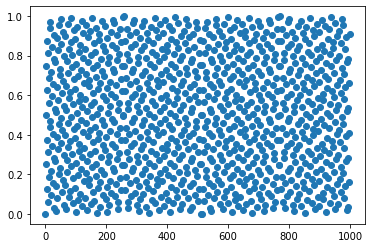

In [48]:
#distribution of SALib sobol_sequence values
sobol_sample = {'id': range(1000), 'x1': sample[:,0], 'x2': sample[:,1], 'x3': sample[:,2]}
df = pd.DataFrame(sobol_sample)
plt.scatter(df['id'], df['x2'])
plt.show()

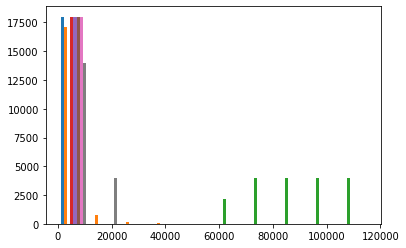

In [49]:
plt.hist(param_values)
plt.show()

### 2. Analyze

`SALib.analyze.sobol.analyze(problem, Y, calc_second_order=True, num_resamples=100, conf_level=0.95, print_to_console=False, parallel=False, n_processors=None, seed=None)`

Perform Sobol Analysis on model outputs.

Returns a dictionary with keys ‘S1’, ‘S1_conf’, ‘ST’, and ‘ST_conf’, where each entry is a list of size D (the number of parameters) containing the indices in the same order as the parameter file. If calc_second_order is True, the dictionary also contains keys ‘S2’ and ‘S2_conf’.

Parameters:	
- problem (dict) – The problem definition
- Y (numpy.array) – A NumPy array containing the model outputs
- calc_second_order (bool) – Calculate second-order sensitivities (default True)
- num_resamples (int) – The number of resamples (default 100)
- conf_level (float) – The confidence interval level (default 0.95)
- print_to_console (bool) – Print results directly to console (default False)

In [50]:
# Run model (example)
Y = borehole_evaluate(param_values)

In [51]:
# print csv for comparison
path = "../data/sobol/py_borehole/py_borehole.csv"

with open(path, 'w') as myfile:
    wr = csv.writer(myfile,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(Y)):
        wr.writerow([Y[i]])

In [52]:
# get intermediate matrices for testing
def separate_output_values(Y, D, N, calc_second_order):
    AB = np.zeros((N, D))
    BA = np.zeros((N, D)) if calc_second_order else None
    step = 2 * D + 2 if calc_second_order else D + 2

    A = Y[0:Y.size:step]
    B = Y[(step - 1):Y.size:step]
    for j in range(D):
        AB[:, j] = Y[(j + 1):Y.size:step]
        if calc_second_order:
            BA[:, j] = Y[(j + 1 + D):Y.size:step]

    return A,B,AB,BA

A,B,AB,BA = separate_output_values(Y, D, N, calc_second_order=True)

In [53]:
# print csv for comparison

path = "../data/sobol/py_borehole/py_A.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(A)):
        wr.writerow([A[i]])
    
path = "../data/sobol/py_borehole/py_B.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(B)):
        wr.writerow([B[i]])
    
path = "../data/sobol/py_borehole/py_AB.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile)
    wr.writerows(AB)
    
path = "../data/sobol/py_borehole/py_BA.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile)
    wr.writerows(BA)

In [54]:
# Perform analysis
Si = sobol.analyze(problem, Y, calc_second_order=True, print_to_console=True, num_resamples = 10000)
print(Si['S1'])
print(Si['S1_conf'])

              ST       ST_conf
rw  6.993656e-01  5.828751e-02
r   2.931494e-06  5.104861e-07
Tu  7.923877e-12  1.298267e-12
Hu  1.100930e-01  1.263765e-02
Tl  8.240910e-06  1.548689e-06
Hl  1.078126e-01  1.240312e-02
L   1.034462e-01  1.221563e-02
Kw  2.523642e-02  2.971785e-03
              S1       S1_conf
rw  6.678523e-01  8.164400e-02
r   6.224038e-05  1.546815e-04
Tu  4.448038e-08  2.437470e-07
Hu  9.131347e-02  2.873072e-02
Tl -4.945711e-05  2.283644e-04
Hl  9.378517e-02  2.665523e-02
L   9.136634e-02  2.600881e-02
Kw  1.804448e-02  1.426069e-02
                    S2       S2_conf
(rw, r)   2.466110e-03  1.239985e-01
(rw, Tu)  2.524685e-03  1.240465e-01
(rw, Hu)  2.680982e-02  1.339067e-01
(rw, Tl)  2.612442e-03  1.240675e-01
(rw, Hl)  1.737219e-02  1.333589e-01
(rw, L)   6.854062e-03  1.306403e-01
(rw, Kw)  7.498686e-03  1.258700e-01
(r, Tu)  -1.231038e-04  2.382384e-04
(r, Hu)  -1.333253e-04  2.468491e-04
(r, Tl)  -1.229549e-04  2.381907e-04
(r, Hl)  -1.366188e-04  2.569707e-0

In [55]:
# print csvs of indices for comparison 
firstorder = Si["S1"]
totalorder = Si["ST"]
secondorder = Si["S2"]

path = "../data/sobol/py_borehole/py_firstorder.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(firstorder)):
        wr.writerow([firstorder[i]])

                
path = "../data/sobol/py_borehole/py_secondorder.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile)
    wr.writerows(secondorder)

    
path = "../data/sobol/py_borehole/py_totalorder.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(totalorder)):
        wr.writerow([totalorder[i]])


In [56]:
# print csvs of CIs for comparisons
firstorder_conf = Si["S1_conf"]
secondorder_conf = Si["S2_conf"]
totalorder_conf = Si["ST_conf"]

path = "../data/sobol/py_borehole/py_firstorder_conf.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(firstorder_conf)):
        wr.writerow([firstorder_conf[i]])
        
path = "../data/sobol/py_borehole/py_secondorder_conf.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile)
    wr.writerows(secondorder_conf)


path = "../data/sobol/py_borehole/py_totalorder_conf.csv"
with open(path, 'w') as myfile:
    wr = csv.writer(myfile,delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(totalorder_conf)):
        wr.writerow([totalorder_conf[i]])

### Analyze - Plotting 

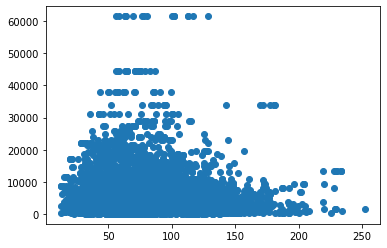

In [57]:
#simple scatter
plt.scatter(Y, param_values[:,1])
plt.show()

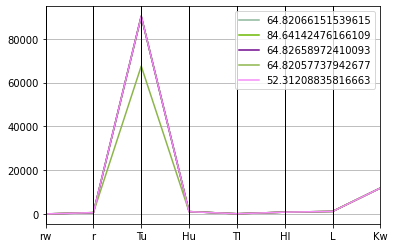

In [58]:
#parallel coordinates (1) 
#http://benalexkeen.com/parallel-coordinates-in-matplotlib/

d = {'output':Y[0:5], 'rw': param_values[0:5,0], 'r': param_values[0:5,1], 'Tu': param_values[0:5,2], 'Hu': param_values[0:5,3], 'Tl': param_values[0:5,4], 'Hl': param_values[0:5,5], 'L': param_values[0:5,6], 'Kw': param_values[0:5,7]}
df = pd.DataFrame(d)
pd.plotting.parallel_coordinates(df, 'output')

plt.show()

In [59]:
#parallel coordinates (2)
#https://stackoverflow.com/questions/23547347/parallel-coordinates-plot-for-continous-data-in-pandas
def parallel_coordinates(frame, class_column, cols=None, ax=None, color=None,
                     use_columns=False, xticks=None, colormap=None,
                     **kwds):
    import matplotlib.pyplot as plt
    import matplotlib as mpl

    n = len(frame)
    class_col = frame[class_column]
    class_min = np.amin(class_col)
    class_max = np.amax(class_col)

    if cols is None:
        df = frame.drop(class_column, axis=1)
    else:
        df = frame[cols]

    used_legends = set([])

    ncols = len(df.columns)

    # determine values to use for xticks
    if use_columns is True:
        if not np.all(np.isreal(list(df.columns))):
            raise ValueError('Columns must be numeric to be used as xticks')
        x = df.columns
    elif xticks is not None:
        if not np.all(np.isreal(xticks)):
            raise ValueError('xticks specified must be numeric')
        elif len(xticks) != ncols:
            raise ValueError('Length of xticks must match number of columns')
        x = xticks
    else:
        x = range(ncols)

    fig = plt.figure()
    ax = plt.gca()

    Colorm = plt.get_cmap(colormap)

    for i in range(n):
        y = df.iloc[i].values
        kls = class_col.iat[i]
        ax.plot(x, y, color=Colorm((kls - class_min)/(class_max-class_min)), **kwds)

    for i in x:
        ax.axvline(i, linewidth=1, color='black')

    ax.set_xticks(x)
    ax.set_xticklabels(df.columns)
    ax.set_xlim(x[0], x[-1])
    ax.legend(loc='upper right')
    ax.grid()

    bounds = np.linspace(class_min,class_max,10)
    cax,_ = mpl.colorbar.make_axes(ax)
    cb = mpl.colorbar.ColorbarBase(cax, cmap=Colorm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%.2f')

    return fig

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


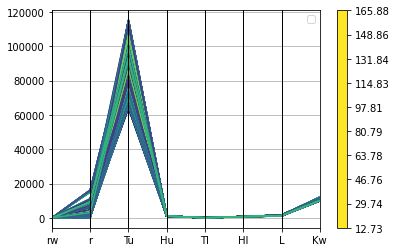

In [60]:
d = {'output':Y[0:500], 'rw': param_values[0:500,0], 'r': param_values[0:500,1], 'Tu': param_values[0:500,2], 'Hu': param_values[0:500,3], 'Tl': param_values[0:500,4], 'Hl': param_values[0:500,5], 'L': param_values[0:500,6], 'Kw': param_values[0:500,7]}
df = pd.DataFrame(d)
parallel_coordinates(df, 'output', colormap="viridis");

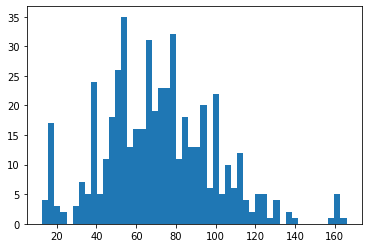

In [61]:
#histogram of output 
plt.hist(df['output'], 50)
plt.show()